In [1]:
import pandas as pd
import numpy as np

In [21]:
embeddings = np.load("./embeddings_data/without_stopwords/bbcnews_nostopwords.npy", allow_pickle=True).item()

In [22]:
import numpy as np
import umap
import matplotlib.pyplot as plt

umap_embeddings = {"mean": {}, "max": {}, "cls": {}}
for key, embedding_list in embeddings.items():
    embedding_arrays = np.array(embedding_list)
    print(embedding_arrays.shape)
    print(key)
    reducer = umap.UMAP(n_components=2)
    umap_embedding = reducer.fit_transform(embedding_arrays)
    
    if "mean" in key:
        umap_embeddings["mean"][key] = umap_embedding
    elif "max" in key:
        umap_embeddings["max"][key] = umap_embedding
    elif "cls" in key:
        umap_embeddings["cls"][key] = umap_embedding



(2225, 768)
get_embedding_layer_output_mean
(2225, 768)
get_embedding_layer_output_cls
(2225, 768)
get_embedding_layer_output_max
(2225, 768)
get_embedding_last_hidden_layer_mean
(2225, 768)
get_embedding_last_hidden_layer_cls
(2225, 768)
get_embedding_last_hidden_layer_max
(2225, 768)
get_embedding_sum_all_layers_mean
(2225, 768)
get_embedding_sum_all_layers_cls
(2225, 768)
get_embedding_sum_all_layers_max
(2225, 768)
get_embedding_second_last_layer_mean
(2225, 768)
get_embedding_second_last_layer_cls
(2225, 768)
get_embedding_second_last_layer_max
(2225, 768)
get_embedding_sum_last_four_layers_mean
(2225, 768)
get_embedding_sum_last_four_layers_cls
(2225, 768)
get_embedding_sum_last_four_layers_max
(2225, 3072)
get_embedding_concat_last_four_layers_mean
(2225, 3072)
get_embedding_concat_last_four_layers_cls
(2225, 3072)
get_embedding_concat_last_four_layers_max


In [23]:
label_mapping = {
    'get_embedding_layer_output_mean': 'Embedding layer',
    'get_embedding_last_hidden_layer_mean': 'Last hidden layer',
    'get_embedding_sum_all_layers_mean': 'Sum all layers',
    'get_embedding_second_last_layer_mean': 'Second last layer',
    'get_embedding_sum_last_four_layers_mean': 'Sum last four layers',
    'get_embedding_concat_last_four_layers_mean': 'Concat last four layers',
    'get_embedding_layer_output_max': 'Embedding layer',
    'get_embedding_last_hidden_layer_max': 'Last hidden layer',
    'get_embedding_sum_all_layers_max': 'Sum all layers',
    'get_embedding_second_last_layer_max': 'Second last layer',
    'get_embedding_sum_last_four_layers_max': 'Sum last four layers',
    'get_embedding_concat_last_four_layers_max': 'Concat last four layers',
    'get_embedding_layer_output_cls': 'Embedding layer',
    'get_embedding_last_hidden_layer_cls': 'Last hidden layer',
    'get_embedding_sum_all_layers_cls': 'Sum all layers',
    'get_embedding_second_last_layer_cls': 'Second last layer',
    'get_embedding_sum_last_four_layers_cls': 'Sum last four layers',
    'get_embedding_concat_last_four_layers_cls': 'Concat last four layers',
}


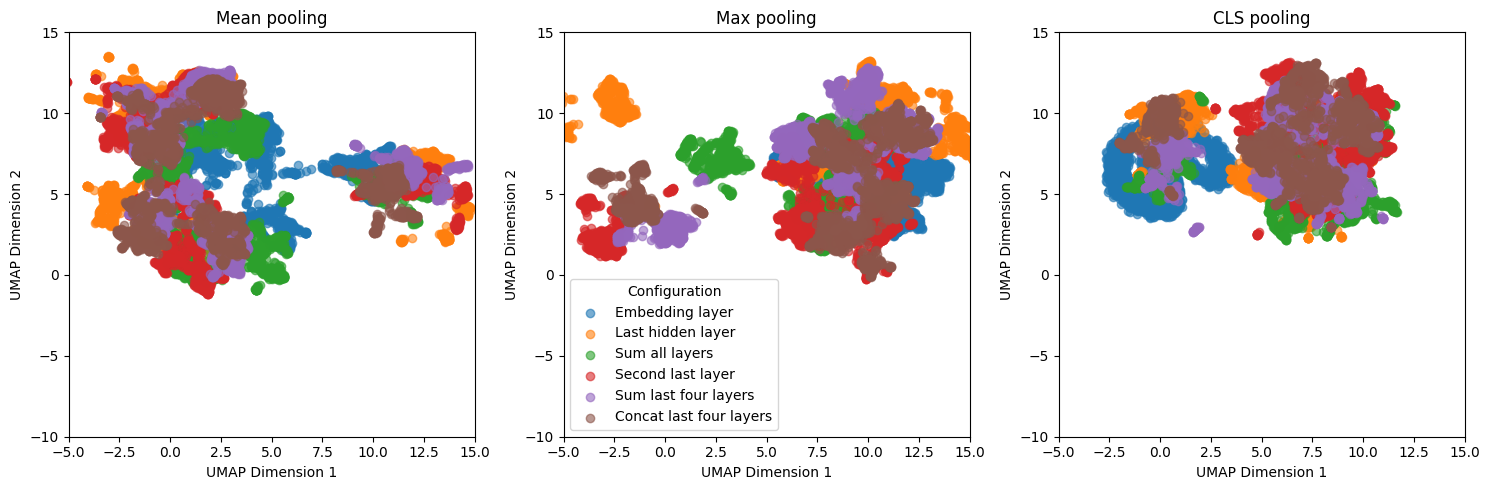

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, (category, embeddings) in enumerate(umap_embeddings.items()):
    axs[i].set_title(f'{category.capitalize() if category != "cls" else category.upper()} pooling')
    for key, embedding in embeddings.items():
        label = label_mapping.get(key, key)
        axs[i].scatter(embedding[:, 0], embedding[:, 1], label=label, alpha=0.6)
    axs[i].set_xlabel('UMAP Dimension 1')
    axs[i].set_ylabel('UMAP Dimension 2')
    
    if category == "max":
        axs[i].legend(title="Configuration")

    axs[i].set_xlim(-5, 15)
    axs[i].set_ylim(-10, 15)

plt.tight_layout()
plt.show()